# Chapter 10

## 10.3 Thresholding 

## 10.4 RP

## 10.5 Logcal

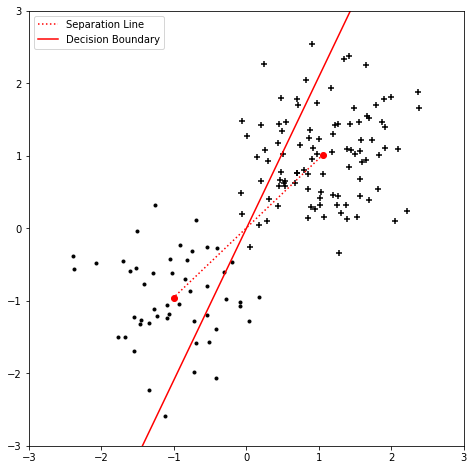

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def linclass(mupos=None, sigpos=None, rhopos=None, muneg=None, signeg=None, rhoneg=None):

    if mupos is None:
        mupos = np.array([1, 1])
        sigpos = np.array([0.4, 0.4])
        rhopos = 0.2
        muneg = np.array([-1, -1])
        signeg = np.array([0.4, 0.4])
        rhoneg = -0.2


    covpos = rhopos * np.sqrt(sigpos[0] * sigpos[1])
    sigmapos = np.array([[sigpos[0], covpos], [covpos, sigpos[1]]])
    
    covneg = rhoneg * np.sqrt(signeg[0] * signeg[1])
    sigmaneg = np.array([[signeg[0], covneg], [covneg, signeg[1]]])

    Npos = 100
    Nneg = 50

    pos = np.random.multivariate_normal(mupos, sigmapos, Npos)
    neg = np.random.multivariate_normal(muneg, sigmaneg, Nneg)

    plt.figure(figsize=(8, 8))
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.scatter(pos[:, 0], pos[:, 1], color='k', marker='+')
    plt.scatter(neg[:, 0], neg[:, 1], color='k', marker='.')
    plt.gca().set_aspect('equal', adjustable='box')

    pos1 = np.hstack([np.ones((Npos, 1)), pos])
    neg1 = np.hstack([np.ones((Nneg, 1)), neg])

    emupos1 = np.mean(pos1, axis=0)
    emuneg1 = np.mean(neg1, axis=0)
    
    plt.plot(emupos1[1], emupos1[2], 'ro')
    plt.plot(emuneg1[1], emuneg1[2], 'ro')

    plt.plot([emupos1[1], emuneg1[1]], [emupos1[2], emuneg1[2]], 'r:', label='Separation Line')

    blc = emupos1 - emuneg1
    x_vals = np.array([-2, 2])
    y_vals = (-blc[0] + x_vals * 2 * blc[1]) / blc[2]
    plt.plot(x_vals, y_vals, 'r-', label='Decision Boundary')

    plt.legend()
    plt.show()

linclass()


## Roccal 